In [1]:
import numpy as np
import pandas as pd

In [2]:
survey_results = pd.read_csv('Concept_Testing_Survey_Form_Responses.csv')

In [3]:
survey_results.describe()

,How motivating is any app to track daily goals?,How helpful is educational content from concept 2?,Progress Report: Which progress reports are useful for you? (Select any).1,Progress Report: Which progress reports are useful for you?.1
count,9.000000,9.000000,0.0,0.0
mean,4.111111,3.222222,NaN,NaN
std,0.600925,1.394433,NaN,NaN
min,3.000000,1.000000,NaN,NaN
25%,4.000000,3.000000,NaN,NaN
50%,4.000000,4.000000,NaN,NaN
75%,4.000000,4.000000,NaN,NaN
max,5.000000,5.000000,NaN,NaN


In [4]:
survey_results.keys()

Index(['Timestamp', 'Have you reviewed the user interface?',
       'Did you find the food log useful?',
       'How useful is the recipe page for you?',
       'How motivating is any app to track daily goals?',
       'What is your experience with meal/calories tracking app?',
       'How well does the concept 1 personalize according to your needs?',
       'How often do you interact with other users through social network?  ',
       'Progress Report: Which progress reports are useful for you? (Select any)',
       'What specific features of concept 1 makes it stand out from others you've used?  ',
       'What additional features would you like to add in concept 1?',
       'Would you like to buy the Concept 1 app?',
       'How well does the concept 2 personalize according to your needs?',
       'How helpful is educational content from concept 2?',
       'Progress Report: Which progress reports are useful for you?',
       'What specific features of concept 2 makes it stand out f

In [5]:
F_definitely_concept1 = 0
for i in range(len(survey_results)):
    if survey_results['Would you like to buy the Concept 1 app?'][i] ==  "Definitely would buy":
        F_definitely_concept1+=(1/8)
    
F_probably_concept1 = 0
for i in range(len(survey_results)):
    if survey_results['Would you like to buy the Concept 1 app?'][i] ==  "Probably would buy":
        F_probably_concept1+=(1/8)
        
F_definitely_concept2 = 0
for i in range(len(survey_results)):
    if survey_results['Would you like to buy the Concept 2 app?'][i] ==  "Definitely would buy":
        F_definitely_concept2+=(1/8)
    
F_probably_concept2 = 0
for i in range(len(survey_results)):
    if survey_results['Would you like to buy the Concept 2 app?'][i] ==  "Probably would buy":
        F_probably_concept2+=(1/8)

In [6]:
print(F_definitely_concept1)
print(F_probably_concept1)

print(F_definitely_concept2)
print(F_probably_concept2)

0.25
0.375
0.125
0.75


In [7]:

# P is the probability that the product is purchased 
# if available and if the customer is  aware of it. 

# F_definitely = is the fraction of survey respondents 
# indicating in the concept test survey that  they would definitely purchase

# F_probably = is the fraction of survey respondents indicating 
# that they would probably purchase

# Cdefinitely and Cprobably are calibration constants 
# usually established based on the experience of a company 
# with similar products in the past. 
# Generally the values of Cdefinitely and  Cprobably fall 
# in these intervals: 
# 0.10 < Cdefinitely < 0.50
# 0 < C_probably < 0.25. 
# Absent prior  history, many teams use values of 
# C_definitely = 0.4 and C_probably = 0.2.


# P = C_definitely * F_definitely + C_probably * F_probably


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Function to calculate P based on given C_definitely and C_probably
def calculate_P(C_definitely, C_probably, F_definitely, F_probably):
    return C_definitely * F_definitely + C_probably * F_probably

# Define a function to update the plot interactively
def update_plot(C_definitely, C_probably):
    P_concept1 = calculate_P(C_definitely, C_probably, F_definitely_concept1, F_probably_concept1)
    P_concept2 = calculate_P(C_definitely, C_probably, F_definitely_concept2, F_probably_concept2)
    
    concepts = ['Concept 1', 'Concept 2']
    P_values = [P_concept1, P_concept2]
    
    plt.figure(figsize=(4, 3))
    plt.bar(concepts, P_values, color=['blue', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Probability P')
    plt.title('Probability of Purchase (P) vs. Concepts')
    plt.grid(axis='y', color='0.95')
    plt.show()

# Set up the sliders for interactivity
C_definitely_slider = FloatSlider(min=0.1, max=0.5, step=0.01, value=0.4, description='C_definitely')
C_probably_slider = FloatSlider(min=0.0, max=0.25, step=0.01, value=0.2, description='C_probably')

# Create the interactive plot
interact(update_plot, C_definitely=C_definitely_slider, C_probably=C_probably_slider)
# not normalized, which is skewing the differences 
# one person prefered concept 1 but wants it to be free lol 

interactive(children=(FloatSlider(value=0.4, description='C_definitely', max=0.5, min=0.1, step=0.01), FloatSl…

<function __main__.update_plot(C_definitely, C_probably)>

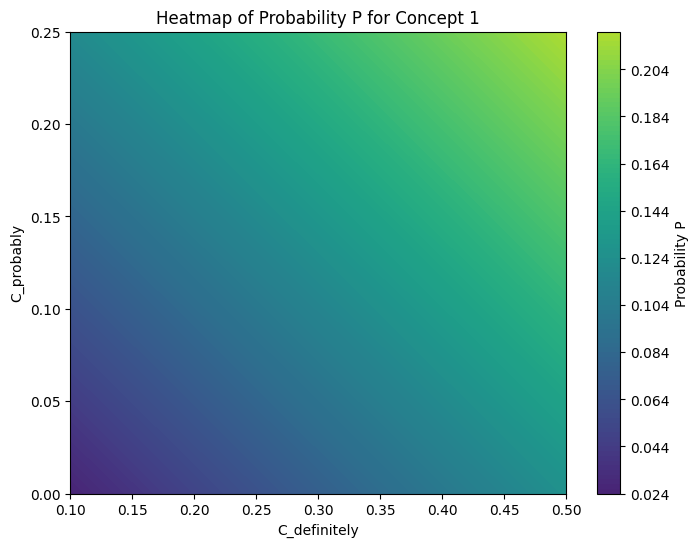

In [9]:
# Define the ranges for C_definitely and C_probably
C_definitely_values = np.linspace(0.1, 0.5, 100)
C_probably_values = np.linspace(0.0, 0.25, 100)

# Create a grid of C_definitely and C_probably values
C_definitely_grid, C_probably_grid = np.meshgrid(C_definitely_values, C_probably_values)

# Calculate P for each combination of C_definitely and C_probably
P_values_concept1 = calculate_P(C_definitely_grid, C_probably_grid, F_definitely_concept1, F_probably_concept1)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.contourf(C_definitely_grid, C_probably_grid, P_values_concept1, levels=100, cmap='viridis')
plt.clim(0, 0.25)
plt.colorbar(label='Probability P')
plt.xlabel('C_definitely')
plt.ylabel('C_probably')
plt.title('Heatmap of Probability P for Concept 1')
plt.show()


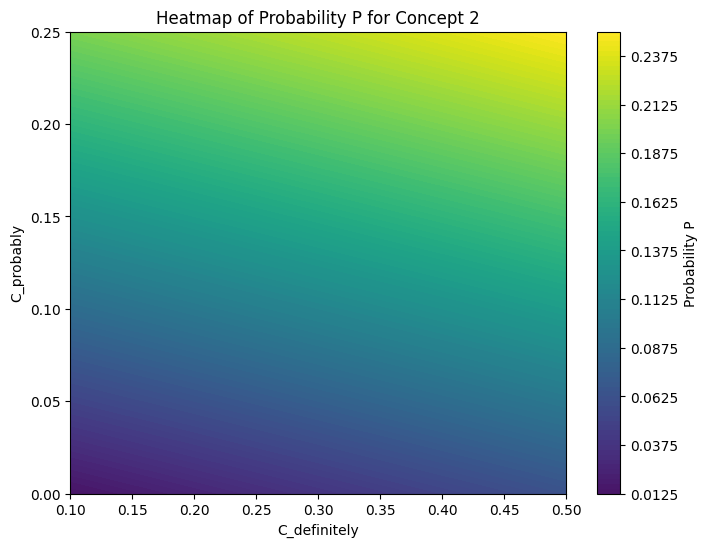

In [10]:
# Calculate P for each combination of C_definitely and C_probably
P_values_concept2 = calculate_P(C_definitely_grid, C_probably_grid, F_definitely_concept2, F_probably_concept2)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.contourf(C_definitely_grid, C_probably_grid, P_values_concept2, levels=100, cmap='viridis')
plt.clim(0, 0.25)
plt.colorbar(label='Probability P')
plt.xlabel('C_definitely')
plt.ylabel('C_probably')
plt.title('Heatmap of Probability P for Concept 2')
plt.show()

In [11]:
import warnings
warnings.filterwarnings("ignore")

# Create a new column with the same length as the DataFrame
survey_results['Filtered Purchase Intent (positive)'] = np.zeros(len(survey_results))

# Apply logic to fill the new column
for i in range(len(survey_results)):
    if survey_results['Overall, which concept did you like?'][i] == 'Concept 1': 
        survey_results['Filtered Purchase Intent (positive)'][i] = survey_results['Would you like to buy the Concept 1 app?'][i]
    else: 
        survey_results['Filtered Purchase Intent (positive)'][i] = survey_results['Would you like to buy the Concept 2 app?'][i]

# Display the updated DataFrame
print(survey_results['Filtered Purchase Intent (positive)'])



0        Probably would buy
1      Definitely would buy
2        Probably would buy
3    Might or might not buy
4        Probably would buy
5        Probably would buy
6      Definitely would buy
7      Definitely would buy
8        Probably would buy
Name: Filtered Purchase Intent (positive), dtype: object


In [12]:
import warnings
warnings.filterwarnings("ignore")


# Create a new column with the same length as the DataFrame
survey_results['Filtered Purchase Intent (negative)'] = np.zeros(len(survey_results))

# Apply logic to fill the new column
for i in range(len(survey_results)):
    if survey_results['Overall, which concept did you like?'][i] == 'Concept 2': 
        survey_results['Filtered Purchase Intent (negative)'][i] = survey_results['Would you like to buy the Concept 1 app?'][i]
    else: 
        survey_results['Filtered Purchase Intent (negative)'][i] = survey_results['Would you like to buy the Concept 2 app?'][i]

# Display the updated DataFrame
print(survey_results['Filtered Purchase Intent (negative)'])


0    Probably would not buy
1    Might or might not buy
2        Probably would buy
3    Might or might not buy
4        Probably would buy
5    Might or might not buy
6        Probably would buy
7        Probably would buy
8    Might or might not buy
Name: Filtered Purchase Intent (negative), dtype: object


In [13]:

# Calculate F_definitely and F_probably for positive and negative outcomes
F_definitely_positive = sum(survey_results['Filtered Purchase Intent (positive)'] == 'Definitely would buy') / len(survey_results)
F_probably_positive = sum(survey_results['Filtered Purchase Intent (positive)'] == 'Probably would buy') / len(survey_results)
F_definitely_negative = sum(survey_results['Filtered Purchase Intent (negative)'] == 'Definitely would buy') / len(survey_results)
F_probably_negative = sum(survey_results['Filtered Purchase Intent (negative)'] == 'Probably would buy') / len(survey_results)

# Define a function to update the plot interactively
def update_plot(C_definitely, C_probably):

    P_concept1 = calculate_P(C_definitely, C_probably, F_definitely_concept1, F_probably_concept1)
    P_concept2 = calculate_P(C_definitely, C_probably, F_definitely_concept2, F_probably_concept2)
    
    P_positive = calculate_P(C_definitely, C_probably, F_definitely_positive, F_probably_positive)
    P_negative = calculate_P(C_definitely, C_probably, F_definitely_negative, F_probably_negative)\
    
    concepts = ['Concept 1', 'Concept 2', 'Customers \n Preference', 'Not \n Customers \n Preference']
    P_values = [P_concept1, P_concept2, P_positive, P_negative]
    
    plt.figure(figsize=(6, 4))
    plt.bar(concepts, P_values, color=['blue', 'green', 'gold', 'gray'])
    plt.ylim(0, 1)
    plt.ylabel('Probability P')
    plt.title('Probability of Purchase Intent \n based on Raw Concepts and Combined Concepts')
    plt.show()

# Set up the sliders for interactivity
C_definitely_slider = FloatSlider(min=0.1, max=0.5, step=0.01, value=0.4, description='C_definitely')
C_probably_slider = FloatSlider(min=0.0, max=0.25, step=0.01, value=0.2, description='C_probably')

# Create the interactive plot
interact(update_plot, C_definitely=C_definitely_slider, C_probably=C_probably_slider)


interactive(children=(FloatSlider(value=0.4, description='C_definitely', max=0.5, min=0.1, step=0.01), FloatSl…

<function __main__.update_plot(C_definitely, C_probably)>

In [ ]:
# MyFitnessPal is a popular mobile app 
# and website for tracking nutrition and exercise. 
# The app was launched in 2005 and acquired by Under Armour in 2015 for $475 million. 
# As of 2021, MyFitnessPal has over 200 million registered users worldwide. 
# The app is available in over 20 languages and is used in over 190 countries.


Polynomial representation of the exponential model:
 
0.2893 x - 579
Predicted value for the year 2005: 2.94


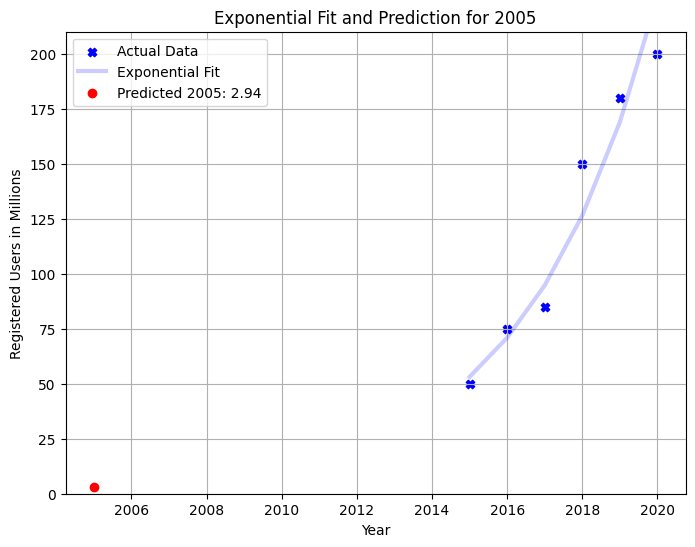

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Prepare the Data
# source of data : https://www.businessofapps.com/data/myfitnesspal-statistics/
years = np.array([2015, 2016, 2017, 2018, 2019, 2020])
values = np.array([50, 75, 85, 150, 180, 200])

# Step 3: Transform the Data
# Apply a logarithmic transformation to the values to fit an exponential model
log_values = np.log(values)

# Step 4: Fit the Data with np.polyfit
# This fits a line to the log-transformed data
coefficients = np.polyfit(years, log_values, 1)

# Create a polynomial object to represent the exponential function
p = np.poly1d(coefficients)

# Print the polynomial
print("Polynomial representation of the exponential model:")
print(p)

# Step 5: Convert the log-linear model back to the exponential form
# y = exp(p(years))
def exponential_model(years):
    return np.exp(p(years))

# Step 6: Predict the Value for the Year 2005
predicted_value_2005 = exponential_model(2005)
print(f"Predicted value for the year 2005: {predicted_value_2005:.2f}")

# Step 7: Plot the Data and the Exponential Fit
plt.figure(figsize=(8, 6))
plt.scatter(years, values, color='blue', marker='X', label='Actual Data')
plt.plot(years, exponential_model(years), color='blue', linewidth=3, alpha=0.2, label='Exponential Fit')
plt.scatter([2005], [predicted_value_2005], color='red', label=f'Predicted 2005: {predicted_value_2005:.2f}')

plt.xlabel('Year')
plt.ylabel('Registered Users in Millions')
plt.title('Exponential Fit and Prediction for 2005')
plt.legend()
plt.grid(True)
plt.ylim(0,210)
plt.show()


In [ ]:
# Q is the quantity we expect to sell 

# N is the potential number of customers to make purchases during the time 
    # this could be the 50% maybes, 80% probablys and 100% of the definitely will buys

#A is the fraction of these potential customers 
# or purchases for which the product is available  
# and the customer is aware of the product.

# P is the probability that the product is purchased 
# if available and if the customer is  aware of it. 



# Q = N * A * P 


In [38]:
# Calculate F_definitely and F_probably for positive and negative outcomes
F_definitely_positive = sum(survey_results['Filtered Purchase Intent (positive)'] == 'Definitely would buy') / len(survey_results)
F_probably_positive = sum(survey_results['Filtered Purchase Intent (positive)'] == 'Probably would buy') / len(survey_results)
F_definitely_negative = sum(survey_results['Filtered Purchase Intent (negative)'] == 'Definitely would buy') / len(survey_results)
F_probably_negative = sum(survey_results['Filtered Purchase Intent (negative)'] == 'Probably would buy') / len(survey_results)

# Define a function to update the plot interactively
def update_plot(C_definitely, C_probably):

    P_concept1 = calculate_P(C_definitely, C_probably, F_definitely_concept1, F_probably_concept1)
    P_concept2 = calculate_P(C_definitely, C_probably, F_definitely_concept2, F_probably_concept2)
    
    P_positive = calculate_P(C_definitely, C_probably, F_definitely_positive, F_probably_positive)
    P_negative = calculate_P(C_definitely, C_probably, F_definitely_negative, F_probably_negative)\
    
    concepts = ['Concept 1', 'Concept 2', 'Customers \n Preference', 'Not \n Customers \n Preference']
    P_values = [P_concept1, P_concept2, P_positive, P_negative]
    

# Define a function to update the plot interactively
def update_plot(C_definitely, C_probably, A):
    # Calculate P for positive and negative outcomes
    P_concept1 = calculate_P(C_definitely, C_probably, F_definitely_concept1, F_probably_concept1)
    P_concept2 = calculate_P(C_definitely, C_probably, F_definitely_concept2, F_probably_concept2)
    
    P_positive = calculate_P(C_definitely, C_probably, F_definitely_positive, F_probably_positive)
    P_negative = calculate_P(C_definitely, C_probably, F_definitely_negative, F_probably_negative)
    
    concepts = ['Concept 1', 'Concept 2', 'Customers \n Preference', 'Not \n Customers \n Preference']
    P_values = [P_concept1, P_concept2, P_positive, P_negative]
    
    # Calculate Q for positive and negative outcomes
    N = 2940000
    Q_concept1 = N * A * P_concept1
    Q_concept2 = N * A * P_concept2
    
    Q_positive = N * A * P_positive
    Q_negative = N * A * P_negative
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Positive P plot
    axs[0].bar(concepts, P_values, color=['blue', 'green', 'gold', 'gray'])
    axs[0].set_ylim(0, 1)
    axs[0].set_ylabel('Probability P')
    axs[0].set_title('\n Probability')
    axs[0].grid(axis='y')
    
    
    # Positive Q plot
    axs[1].bar(concepts[0], [Q_concept1], color='blue')
    axs[1].bar(concepts[1], [Q_concept2], color='green')
    axs[1].bar(concepts[2], [Q_positive], color='gold')
    axs[1].bar(concepts[3], [Q_negative], color='gray')
    axs[1].set_ylim(0, N * A)  # Set the y-axis limit based on potential max value
    axs[1].set_ylabel('Q (Quantity Sold)')
    axs[1].set_title('\n Predicted Quantity')
    axs[1].grid(axis='y')

    
    plt.suptitle('Probability and Quantity for Customer Preferences \n')

    plt.show()
    

# Set up the sliders for interactivity
C_definitely_slider = FloatSlider(min=0.1, max=0.5, step=0.01, value=0.4, description='C_definitely')
C_probably_slider = FloatSlider(min=0.0, max=0.25, step=0.01, value=0.2, description='C_probably')
A_slider = FloatSlider(min=0.0, max=1.0, step=0.01, value=0.8, description='A')

# Create the interactive plot
interact(update_plot, C_definitely=C_definitely_slider, C_probably=C_probably_slider, N=N_slider, A=A_slider)


interactive(children=(FloatSlider(value=0.4, description='C_definitely', max=0.5, min=0.1, step=0.01), FloatSl…

<function __main__.update_plot(C_definitely, C_probably, A)>